In [156]:
# function for later confusion matrix, just to setup the figure etc 
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Import relevant libraries

In [46]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline


## Explore the Kaggle Titanic competition data 

In [47]:
data_path = '/home/ubuntu/data/titanic'
titanic_df = pd.read_csv(data_path + '/train.csv')
train_df = titanic_df 
test_df = pd.read_csv(data_path + '/test.csv')
combine = [train_df, test_df]

In [48]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [49]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
test_submission = pd.read_csv(data_path + '/gender_submission.csv')
test_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [53]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [54]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [55]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [56]:
train_df[['Sex', 'Survived']].groupby(['Sex']).size()

Sex
female    314
male      577
dtype: int64

In [57]:
train_df[['Sex', 'Survived']].groupby(['Sex','Survived']).size(), 

(Sex     Survived
 female  0            81
         1           233
 male    0           468
         1           109
 dtype: int64,)

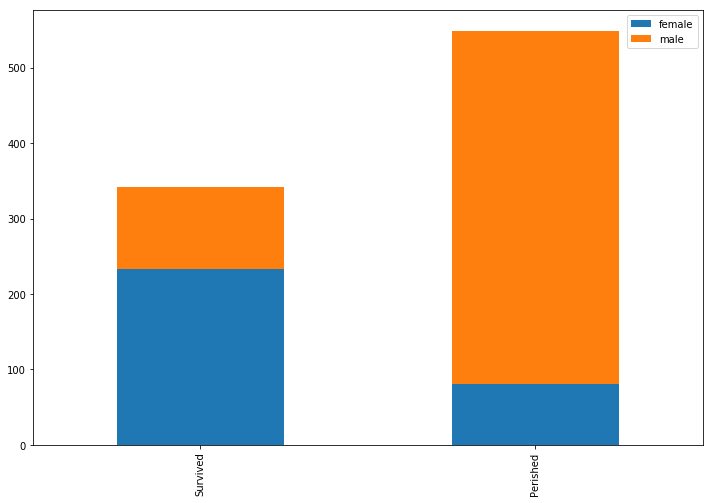

In [190]:
survived_sex = titanic_df[titanic_df['Survived']==1]['Sex'].value_counts()
dead_sex = titanic_df[titanic_df['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Perished']
df.plot(kind='bar',stacked=True, figsize=(12,8))

## Make a submission to Kaggle

In [164]:
df_ids = test_df[['PassengerId']]
df = pd.DataFrame(np.ones(len(test_df),dtype=np.int))
subm_df = df_ids.join(df)

In [165]:
subm_df.values[0:5]

array([[892,   1],
       [893,   1],
       [894,   1],
       [895,   1],
       [896,   1]])

In [60]:
from IPython.display import FileLink

%cd /home/ubuntu/data/titanic/submissions
submission_file_name = 'submis_all_1.csv'
np.savetxt(submission_file_name, subm_df.values, fmt='%d,%d', header='PassengerId,Survived', comments='')

FileLink('/home/ubuntu/data/titanic/submissions/submis_all_1.csv')

/home/ubuntu/data/titanic/submissions


/home/ubuntu/data/titanic/submissions/submis_all_1.csv

In [170]:
# submitted at this point with an accuracy score of 0.37321 on the test data
# make the calculation for accuracy here - then use scikit learns version, 
# change the submission 1 only for 1st class women

# make a submission to Kaggle
pred_ids = train_df[['PassengerId', 'Survived']]
pred_surv = pd.DataFrame(np.zeros(len(train_df),dtype=np.int), columns={'Predict'})
pred_df = pred_ids.join(pred_surv)
pred_df[0:5]

,PassengerId,Survived,Predict
0,1,0,0
1,2,1,0
2,3,1,0
3,4,1,0
4,5,0,0


## Determine the accuracy locally

In [171]:
from sklearn.metrics import accuracy_score

accuracy_score(pred_df['Survived'], pred_df['Predict'])

0.61616161616161613

Confusion matrix, without normalization
[[549   0]
 [342   0]]


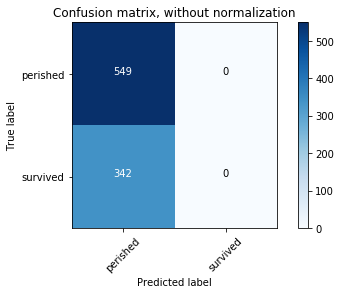

In [172]:
from sklearn.metrics import confusion_matrix

# 0: perished, 1: survived
# y axis is true, x axis is prediction

cnf_matrix = confusion_matrix(pred_df['Survived'], pred_df['Predict'])

class_names = np.array(['perished', 'survived'])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

## Improve prediction by selecting key columns

In [173]:
pred_df.Predict = 0
pred_df.Predict[(train_df.Pclass == 1)|(train_df.Pclass == 2)] = 1
accuracy_score(pred_df['Survived'], pred_df['Predict'])

0.66778900112233441

In [176]:
pred_df.Predict = 0
pred_df.Predict[train_df.Sex == 'female'] = 1
accuracy_score(pred_df['Survived'], pred_df['Predict'])

0.78675645342312006

Confusion matrix, without normalization
[[468  81]
 [109 233]]


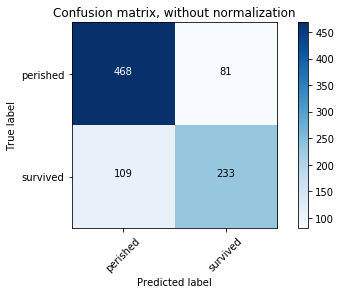

In [178]:
plt.figure()
cnf_matrix = confusion_matrix(pred_df['Survived'], pred_df['Predict'])
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

In [66]:
bins = [0, 10, 20, 30, 520]
group_names = ['Cheapest', 'Cheap', 'Middle', 'Expensive']
train_df['FareGroup'] = pd.cut(train_df['Fare'], bins, labels=group_names)

train_df[['FareGroup', 'Survived', 'Sex']].groupby(['FareGroup', 'Sex'], as_index=False).mean()

,FareGroup,Sex,Survived
0,Cheapest,female,0.593750
1,Cheapest,male,0.108949
2,Cheap,female,0.730769
3,Cheap,male,0.188119
4,Middle,female,0.694915
5,Middle,male,0.265060
6,Expensive,female,0.858407
7,Expensive,male,0.322314


In [67]:
pred_df.Predict[train_df.FareGroup == 'Cheapest'] = 0
accuracy_score(pred_df['Survived'], pred_df['Predict'])

0.77328843995510665

In [68]:
pred_df.head()

,PassengerId,Survived,Predict
0,1,0,0
1,2,1,1
2,3,1,0
3,4,1,1
4,5,0,0


## Can we find something to search the combination of parameters for us

In [90]:
# define training and testing sets

Y_train = titanic_df["Survived"]
X_test  = test_df.drop(['PassengerId','Cabin','Name','Ticket','Embarked'],axis=1)

In [100]:
X_train2 = titanic_df.drop(['PassengerId','Cabin','Survived','Name','Ticket','Embarked','FareGroup'],axis=1)

## We need to remove the categorical values

In [101]:
# X_train2['Sex'].astype(int)
gender_code = {"male":0 ,"female" :1}
X_train2['Gender'] = X_train2['Sex'].apply(gender_code.get).astype(float)
X_train2 = X_train2.drop(['Sex'], axis=1)

## If you run any models at this point they will fail due to null values

In [102]:
X_train2.isnull().sum()

Pclass      0
Age       177
SibSp       0
Parch       0
Fare        0
Gender      0
dtype: int64

In [103]:
X_train2.loc[X_train2['Age'].isnull()] = 0
X_train2.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
Gender    0
dtype: int64

In [115]:
# do the same to the test set so it is the same as X_train2
X_test['Gender'] = X_test['Sex'].apply(gender_code.get).astype(float)
X_test = X_test.drop(['Sex'], axis=1)
X_test.loc[X_test['Age'].isnull()] = 0
X_test.loc[X_test['Fare'].isnull()] = 0

## Decision Tree

In [154]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train2, Y_train)
Y_pred = clf.predict(X_test)
clf.score(X_train2, Y_train)

# 0.7 on Kaggle

0.93041526374859707

Confusion matrix, without normalization
[[549   0]
 [ 62 280]]


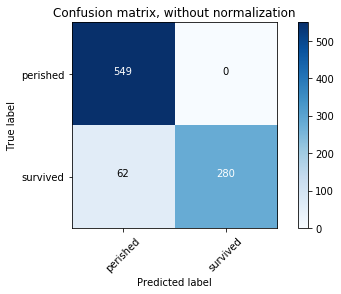

In [180]:
Y_train_pred = clf.predict(X_train2)
cnf_matrix = confusion_matrix(Y_train, Y_train_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

## Imputing data

In [ ]:
# sort out the age data and the fare data to input the mean

In [213]:
X_train2.loc[X_train2['Age']==0] = X_train2['Age'].mean()
X_train2.describe()

,Pclass,Age,SibSp,Parch,Fare,Gender
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,6.520174,28.527099,5.138580,5.073485,32.530143,5.020735
std,8.640650,13.213618,9.333464,9.359929,47.564641,9.364935
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,9.500000,0.000000
50%,3.000000,24.000000,0.000000,0.000000,23.799293,0.000000
75%,3.000000,35.000000,2.000000,2.000000,27.900000,1.000000
max,23.799293,80.000000,23.799293,23.799293,512.329200,23.799293


In [214]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train2, Y_train)
Y_pred = clf.predict(X_test)
clf.score(X_train2, Y_train)


0.93041526374859707

## Feature engineering

In [192]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(X_train2, Y_train)

In [195]:
features = pd.DataFrame()
features['feature'] = X_train2.columns
features['importance'] = clf.feature_importances_
features.sort_values(['importance'],ascending=False)

,feature,importance
5,Gender,0.290897
1,Age,0.266628
4,Fare,0.246484
0,Pclass,0.112619
2,SibSp,0.041716
3,Parch,0.041656


In [268]:
# add the cabin column? and family size 
X_train2.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Gender        0
FamilySize    0
IsAlone       0
Child         0
dtype: int64

In [258]:
full_data = [X_train2, X_test]

for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
        
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
for dataset in full_data:
    dataset['Child'] = 0
    dataset.loc[dataset['Age'] < 16, 'Child'] = 1

In [266]:
# check this bit

coeff_df = pd.DataFrame(X_train2.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
5,Gender,2.572648
4,Fare,0.012137
1,Age,-0.010334
3,Parch,-0.130495
2,SibSp,-0.269300
0,Pclass,-0.363473
6,FamilySize,NaN
7,IsAlone,NaN
8,Child,NaN


In [272]:
logreg = LogisticRegression()
logreg.fit(X_train2, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train2, Y_train) * 100, 2)
acc_log



79.239999999999995

In [274]:
# Random Forests - might be better if have more features. 
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=10)
random_forest.fit(X_train2, Y_train)
Y_pred = random_forest.predict(X_test)
# random_forest.score(X_train2, Y_train)
Y_train_pred = random_forest.predict(X_train2)
accuracy_score(Y_train, Y_train_pred)
acc_log = round(random_forest.score(X_train2, Y_train) * 100, 2)
acc_log

93.040000000000006

In [256]:
count = len(["ok" for idx, label in enumerate(Y_train) if label == Y_train_pred[idx]])
# print "Accuracy Rate, which is calculated manually is: %f" % (float(count) / len(test_labels))
# Accuracy = (Number of elements correctly classified)/(Total elements)
len(Y_train)

(549+280)

829

Confusion matrix, without normalization
[[549   0]
 [ 62 280]]


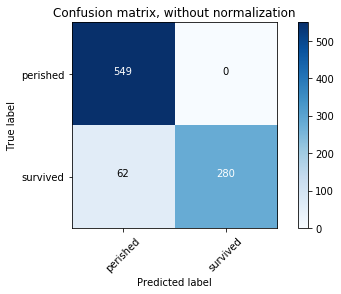

In [231]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

In [121]:
%cd /home/ubuntu/data/titanic/submissions

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic_randomForest.csv', index=False)

/home/ubuntu/data/titanic/submissions


## Grid search

In [203]:
from sklearn.model_selection import StratifiedKFold

forest = RandomForestClassifier(max_features='sqrt')

parameter_grid = {
                 'max_depth' : [4,5,6,7,8],
                 'n_estimators': range(200,300,10),
                 'criterion': ['gini','entropy']
                 }

cross_validation = StratifiedKFold(Y_train)

grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X_train2, Y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

ValueError: The number of folds must be of Integral type. 0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64 of type <class 'pandas.core.series.Series'> was passed.